<a href="https://colab.research.google.com/github/Kunal726/LP5/blob/main/Multiclass_classification_using_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [5]:
#load Dataset
df = pd.read_csv('letter-recognition.csv')

In [6]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [14]:
# Preprocess the dataset
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [15]:
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]])

In [21]:
len(pd.unique(Y))

26

In [17]:
# Convert labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

In [18]:
y

array([19,  8,  3, ..., 19, 18,  0])

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create NN Model
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape=(16,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(26, activation = 'softmax'))

In [23]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Train the model and track the training progress
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 3s 3ms/step - loss: 1.7639 - accuracy: 0.5010 - val_loss: 1.0846 - val_accuracy: 0.7013
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.9649 - accuracy: 0.7216 - val_loss: 0.9294 - val_accuracy: 0.7335
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.7792 - accuracy: 0.7688 - val_loss: 0.7155 - val_accuracy: 0.7977
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.6732 - accuracy: 0.7968 - val_loss: 0.5967 - val_accuracy: 0.8215
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5950 - accuracy: 0.8198 - val_loss: 0.6052 - val_accuracy: 0.8160
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.8371 - val_loss: 0.5209 - val_accuracy: 0.8322
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 0.4909 - accuracy: 0.8462 - val_loss: 0.4743 - val_accuracy: 0.8525
Epoch 

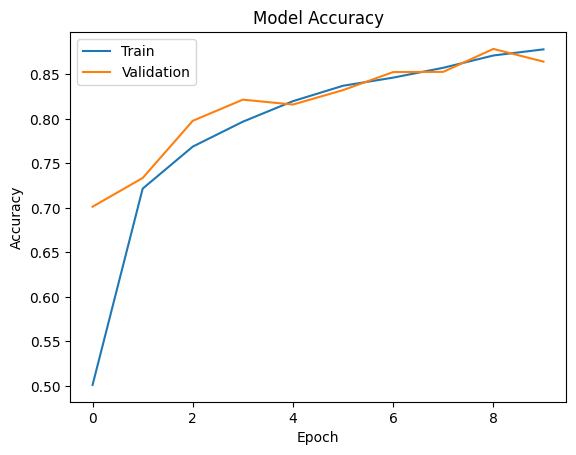

In [26]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

125/125 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8643
Test Loss: 0.4185
Test Accuracy: 0.8643


In [42]:
X_test[0:2]

array([[ 3,  6,  5,  6,  4,  6,  7,  3,  8,  8,  6,  9,  3,  7,  7,  6],
       [ 4, 11,  6,  8,  8,  7,  8,  3,  5,  6,  6, 10,  6, 11,  7,  5]])

In [43]:
y_test[0:2]

array([19, 11])

In [46]:
# Make predictions
predictions = model.predict(X_test)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

125/125 [==============================] - 0s 1ms/step


In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.86425
